In [1]:
import keras
from keras.layers import *
import matplotlib.pyplot as plt
import numpy as np
import keras.utils
from tensorflow.keras.preprocessing import image

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [3]:
input_shape = (28, 28, 1)

In [4]:
x_train = x_train / 255
x_test = x_test / 255
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

In [13]:
model_4 = keras.Sequential([
      keras.Input(shape=input_shape),
      Conv2D(32, padding = 'same', kernel_size = (3,3), activation = 'relu' ),
      MaxPooling2D( (2,2), strides = 2),
      Conv2D(64, padding = 'same', kernel_size = (3,3), activation = 'relu' ),
      MaxPooling2D( (2,2), strides = 2),
      Conv2D(128, padding = 'same', kernel_size = (3,3), activation = 'relu' ),
      MaxPooling2D( (2,2), strides = 2),
      Dropout(0.5),
      Flatten(), # перевод в одномерный массив
      Dense(100,activation = 'relu'), # количество входных нейронов
      Dense(50, activation = 'relu'),
      Dense(10, activation = 'softmax')   # количество выходных нейронов
      ] )

In [14]:
model_4.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [15]:
%%time

history = model_4.fit(x_train, y_train_cat, batch_size=50, epochs=10,validation_data =(x_test, y_test_cat) )


Epoch 1/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 49s 38ms/step - accuracy: 0.7073 - loss: 0.7771 - val_accuracy: 0.8656 - val_loss: 0.3739
Epoch 2/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 46s 38ms/step - accuracy: 0.8698 - loss: 0.3523 - val_accuracy: 0.8926 - val_loss: 0.2886
Epoch 3/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 42s 35ms/step - accuracy: 0.8911 - loss: 0.2903 - val_accuracy: 0.9049 - val_loss: 0.2631
Epoch 4/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 44s 37ms/step - accuracy: 0.9037 - loss: 0.2636 - val_accuracy: 0.9050 - val_loss: 0.2573
Epoch 5/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 40s 34ms/step - accuracy: 0.9091 - loss: 0.2429 - val_accuracy: 0.9100 - val_loss: 0.2421
Epoch 6/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 42s 35ms/step - accuracy: 0.9150 - loss: 0.2251 - val_accuracy: 0.9087 - val_loss: 0.2464
Epoch 7/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 43s 36ms/step - accuracy: 0.9207 - loss: 0.2152 - val_accuracy: 0.9177 - val_loss: 0.2253
Epoch 8/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 41s 34ms/step - accuracy: 0.9247 -

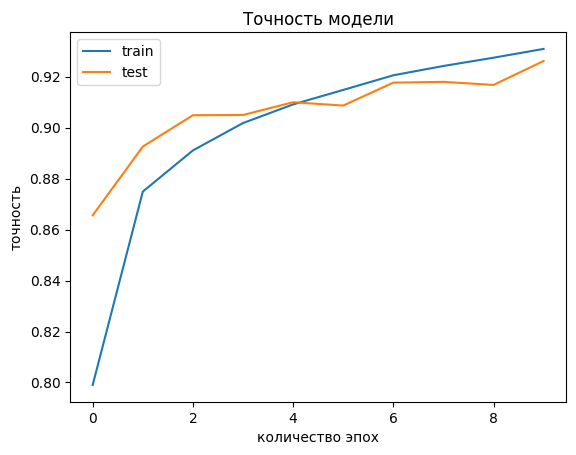

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Точность модели')
plt.ylabel('точность')
plt.xlabel('количество эпох')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

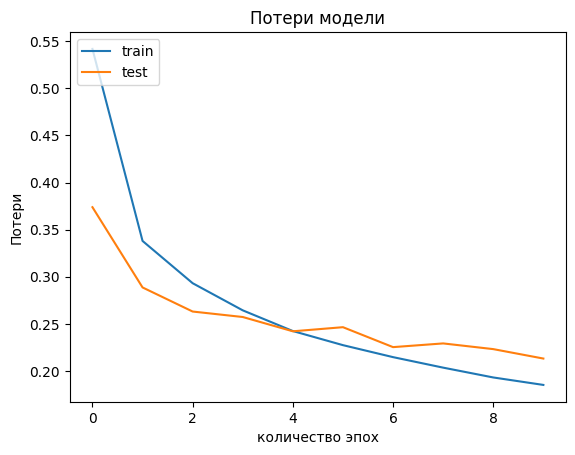

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Потери модели')
plt.ylabel('Потери')
plt.xlabel('количество эпох')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [18]:
model_4.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │       115,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 640,598 (2.44 MB)

 Trainable params: 213,532 (834.11 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 427,066 (1.63 MB)